In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats as sms
import seaborn as sns
import matplotlib.pyplot as plt
import time
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import library as lib
sns.set_style('darkgrid')
%load_ext autoreload
%autoreload 2

In [20]:
# all of the data cleaning and analysis for the time 
# gather
time_df = pd.read_pickle('time_predict.pkl')
time_df.loc[time_df.age.isna(), 'age'] = time_df.age.median()
# clean
xtime_df = time_df[time_df.columns[11:39]]
ytime_df = time_df[time_df.columns[39]]
xtime_df.drop(columns=['fighter', 'total_rounds_fought', 'total_time_fought(seconds)', 'Stance'], inplace=True)
# tt_split
x_train, x_test, y_train, y_test = train_test_split(xtime_df, ytime_df, test_size=.2, random_state=42)


# modeling - OLS
time_mod_baseline = lib.modeling(x_train, x_test, y_train, y_test, lasso_alpha=0);

# polynomial models with Lasso
poly1_larsic_time = lib.modeling(x_train, x_test, y_train, y_test, lars_ic=True, kfold=True, k_n_splits=5);
poly2_larsic_time = lib.modeling(x_train, x_test, y_train, y_test, lars_ic=True, poly_order=2, kfold=True, k_n_splits=5)
# poly3_larsic_time = lib.modeling(x_train, x_test, y_train, y_test, lars_ic=True, poly_order=3, kfold=True, k_n_splits=5)
poly2_larsic_time_1m = lib.modeling(x_train, x_test, y_train, y_test, lars_ic=True, poly_order=2, iterations=100000, kfold=True, k_n_splits=5)

modeling_T_df = pd.concat([poly1_larsic_time[3],poly2_larsic_time[3],poly3_larsic_time[3], poly2_larsic_time_1m[3]], axis=0)
modeling_T_df

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/flatironschool/Desktop/Io/mod4proj/UFC-Fight-Duration-Analysis/library.py:80: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  fit = lasso_reg.fit(x_poly_train, y_train)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not

The R-2 for a model with with a Polynomial Order of 1 and a Lasso Alpha of 0 is 0.055.
  Function returns a tuple indexed as follows:  
  0 - Sklearn lasso-regression object  
  1 - training X data (np array) 
 2 - testing X data (np array) 
   3  -  Model results table (pandas DataFrame obj  
  4  -  training Y data (np array)  
  5  -  testing Y data (np array) 
The R-2 for a LASSO Least Angle Regression model with with a Polynomial Order of 1 is 0.053075335276100866.
 The model with the lowest AIC of 7758.227384650871 has a LASSO alpha of 2.92591081501784 
 Function returns a tuple indexed as follows: 
 0 - Sklearn lasso-regression object  
  1 - training X data (np array) 
 2 - testing X data (np array)  
 3  -  Model results table (pandas DataFrame obj 
  4  -  training Y data (np array)  
  5  -  testing Y data (np array)
The R-2 for a LASSO Least Angle Regression model with with a Polynomial Order of 2 is 0.06163495208515235.
 The model with the lowest AIC of 7705.591066201889 h

,R2,AIC,Optimal_alpha,Mean_cvs
TIME_polyO1_5ksplits,0.053075,7758.227385,2.925911,0.067724
TIME_polyO2_5ksplits,0.061635,7705.591066,3.262067,0.070936
TIME_polyO3_5ksplits,0.054464,7767.477914,5.933679,0.023647
TIME_polyO2_5ksplits_iter100000,0.061635,7705.591066,3.262067,0.070936


In [23]:
# Fight stat analysis now comes for the pct sig strikes landed

# gather
fstat_df = pd.read_pickle('post2001_norm_str_pct.pkl')

# clean
xstat_df = fstat_df[fstat_df.columns[2:26]]
ystat_df = fstat_df['avg_SIG_STR_pct']

# tt_split; 'ss' refers to 'significant strikes', because str would have been confusing
xss_train, xss_test, yss_train, yss_test = train_test_split(xstat_df, ystat_df, test_size=.2, random_state=42)

# modeling - OLS
sig_str_baseline = lib.modeling(xss_train, xss_test, yss_train, yss_test, lasso_alpha=0)

# polynomial models with Lasso
poly1_larsic_ss = lib.modeling(xss_train, xss_test, yss_train, yss_test, lars_ic=True, kfold=True, k_n_splits=5)
poly2_larsic_ss = lib.modeling(xss_train, xss_test, yss_train, yss_test, lars_ic=True, poly_order=2, kfold=True, k_n_splits=5)
poly3_larsic_ss = lib.modeling(xss_train, xss_test, yss_train, yss_test, lars_ic=True, poly_order=3, kfold=True, k_n_splits=5)
poly2_larsic_ss_1m = lib.modeling(xss_train, xss_test, yss_train, yss_test, lars_ic=True, poly_order=2, kfold=True, k_n_splits=5, iterations=1000000)

modeling_SS_df = pd.concat([poly1_larsic_ss[3],poly2_larsic_ss[3],poly3_larsic_ss[3], poly2_larsic_ss_1m[3]], axis=0)
modeling_SS_df

/Users/flatironschool/Desktop/Io/mod4proj/UFC-Fight-Duration-Analysis/library.py:80: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  fit = lasso_reg.fit(x_poly_train, y_train)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.579619925107384, tolerance: 0.005550102393696854
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use 

The R-2 for a model with with a Polynomial Order of 1 and a Lasso Alpha of 0 is 0.1391.
  Function returns a tuple indexed as follows:  
  0 - Sklearn lasso-regression object  
  1 - training X data (np array) 
 2 - testing X data (np array) 
   3  -  Model results table (pandas DataFrame obj  
  4  -  training Y data (np array)  
  5  -  testing Y data (np array) 
The R-2 for a LASSO Least Angle Regression model with with a Polynomial Order of 1 is 0.13900995481245304.
 The model with the lowest AIC of 5676.89359663237 has a LASSO alpha of 3.481432842962817e-06 
 Function returns a tuple indexed as follows: 
 0 - Sklearn lasso-regression object  
  1 - training X data (np array) 
 2 - testing X data (np array)  
 3  -  Model results table (pandas DataFrame obj 
  4  -  training Y data (np array)  
  5  -  testing Y data (np array)
The R-2 for a LASSO Least Angle Regression model with with a Polynomial Order of 2 is 0.2063218855577036.
 The model with the lowest AIC of 5242.01993048051

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 696 iterations, alpha=4.358e-04, previous alpha=4.323e-04, with an active set of 457 regressors.
  ConvergenceWarning)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:604: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 646 iterations, alpha=5.234e-04, previous alpha=5.200e-04, with an active set of 401 regressors.
  ConvergenceWarning)


The R-2 for a LASSO Least Angle Regression model with with a Polynomial Order of 3 is 0.25427771363352303.
 The model with the lowest AIC of 5274.71764747689 has a LASSO alpha of 0.0006451499609383627 
 Function returns a tuple indexed as follows: 
 0 - Sklearn lasso-regression object  
  1 - training X data (np array) 
 2 - testing X data (np array)  
 3  -  Model results table (pandas DataFrame obj 
  4  -  training Y data (np array)  
  5  -  testing Y data (np array)
The R-2 for a LASSO Least Angle Regression model with with a Polynomial Order of 2 is 0.2063218855577036.
 The model with the lowest AIC of 5242.019930480519 has a LASSO alpha of 0.00017961761388468484 
 Function returns a tuple indexed as follows: 
 0 - Sklearn lasso-regression object  
  1 - training X data (np array) 
 2 - testing X data (np array)  
 3  -  Model results table (pandas DataFrame obj 
  4  -  training Y data (np array)  
  5  -  testing Y data (np array)


,R2,AIC,Optimal_alpha,Mean_cvs
avg__polyO1_5ksplits,0.139010,5676.893597,0.000003,0.106579
avg__polyO2_5ksplits,0.206322,5242.019930,0.000180,0.173234
avg__polyO3_5ksplits,0.254278,5274.717647,0.000645,0.201967
avg__polyO2_5ksplits_iter1000000,0.206322,5242.019930,0.000180,0.173234


In [22]:
# now again we do the same, but for the pct of successful takedowns. We will have to cutout 
# the outliers from our data

# input df stays the same
ytd_df = fstat_df['avg_TD_pct']

# tt_split; 'td' - takedowns
xtd_train, xtd_test, ytd_train, ytd_test = train_test_split(xstat_df, ytd_df, test_size=.2, random_state=42)

# modeling - OLS
sig_td_baseline = lib.modeling(xtd_train, xtd_test, ytd_train, ytd_test, lasso_alpha=0)

# polynomial orders with Lasso
poly1_larsic_td = lib.modeling(xtd_train, xtd_test, ytd_train, ytd_test, lars_ic=True, kfold=True, k_n_splits=5)
poly2_larsic_td = lib.modeling(xtd_train, xtd_test, ytd_train, ytd_test, lars_ic=True, poly_order=2, kfold=True, k_n_splits=5)
# poly3_larsic_td = lib.modeling(xtd_train, xtd_test, ytd_train, ytd_test, lars_ic=True, poly_order=3, kfold=True, k_n_splits=5)
poly2_larsic_td_1m = lib.modeling(xtd_train, xtd_test, ytd_train, ytd_test, lars_ic=True, poly_order=2, kfold=True, k_n_splits=5, iterations=1000000)

modelling_TD_df = pd.concat([poly1_larsic_td[3],poly2_larsic_td[3],poly3_larsic_td[3], poly2_larsic_td_1m[3]], axis=0)
modelling_TD_df

/Users/flatironschool/Desktop/Io/mod4proj/UFC-Fight-Duration-Analysis/library.py:80: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  fit = lasso_reg.fit(x_poly_train, y_train)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154.07349564239715, tolerance: 0.03391151085130912
  positive)
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use t

The R-2 for a model with with a Polynomial Order of 1 and a Lasso Alpha of 0 is 0.0808.
  Function returns a tuple indexed as follows:  
  0 - Sklearn lasso-regression object  
  1 - training X data (np array) 
 2 - testing X data (np array) 
   3  -  Model results table (pandas DataFrame obj  
  4  -  training Y data (np array)  
  5  -  testing Y data (np array) 
The R-2 for a LASSO Least Angle Regression model with with a Polynomial Order of 1 is 0.08110874369134558.
 The model with the lowest AIC of 5807.351363462273 has a LASSO alpha of 0.00013825188834428319 
 Function returns a tuple indexed as follows: 
 0 - Sklearn lasso-regression object  
  1 - training X data (np array) 
 2 - testing X data (np array)  
 3  -  Model results table (pandas DataFrame obj 
  4  -  training Y data (np array)  
  5  -  testing Y data (np array)
The R-2 for a LASSO Least Angle Regression model with with a Polynomial Order of 2 is 0.14274850642470138.
 The model with the lowest AIC of 5470.32144557

,R2,AIC,Optimal_alpha,Mean_cvs
avg__polyO1_5ksplits,0.081109,5807.351363,0.000138,0.083845
avg__polyO2_5ksplits,0.142749,5470.321446,0.000623,0.137525
avg__polyO3_5ksplits,0.168318,5486.895433,0.001629,0.156015
avg__polyO2_5ksplits_iter1000000,0.142749,5470.321446,0.000623,0.137525


In [25]:
len(poly2_larsic_time_100k)

4

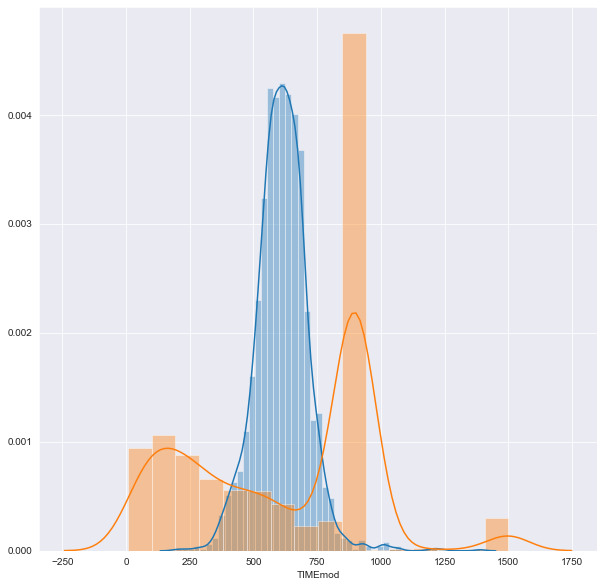

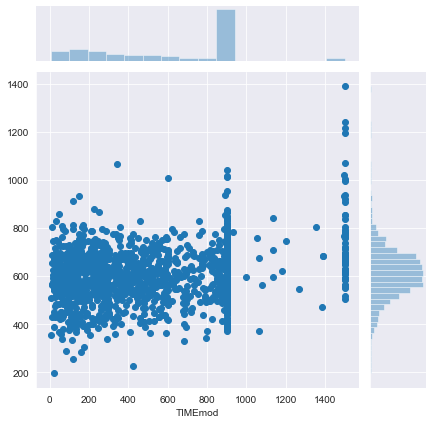

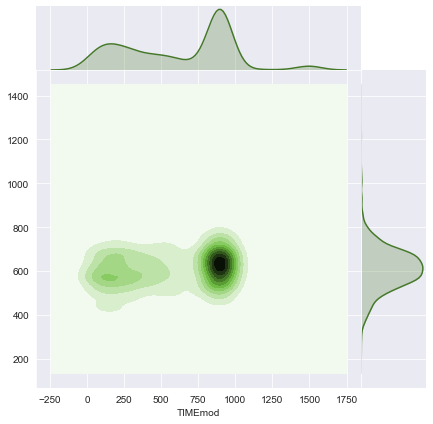

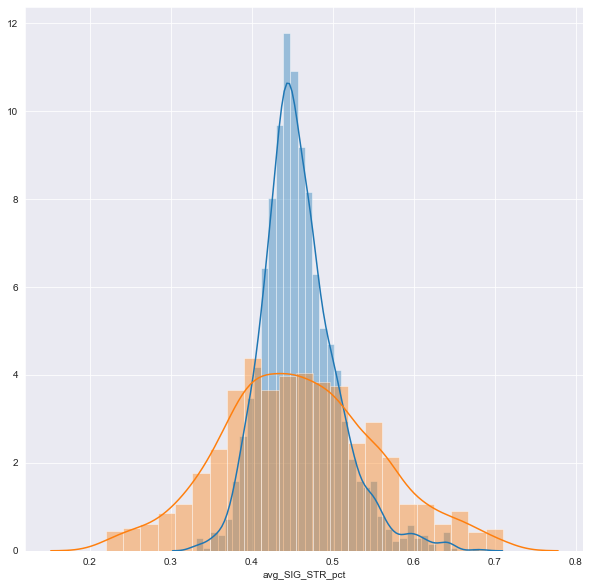

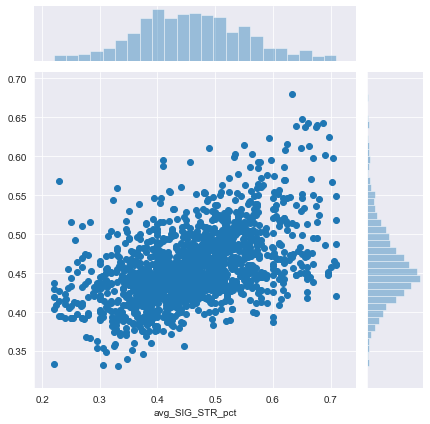

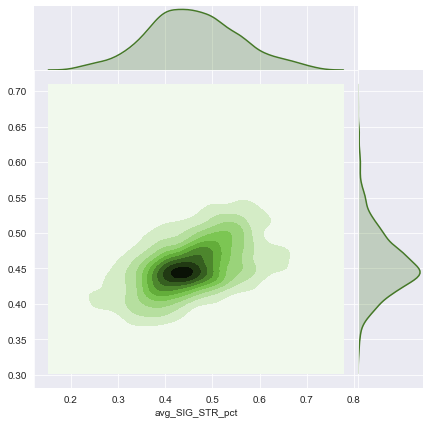

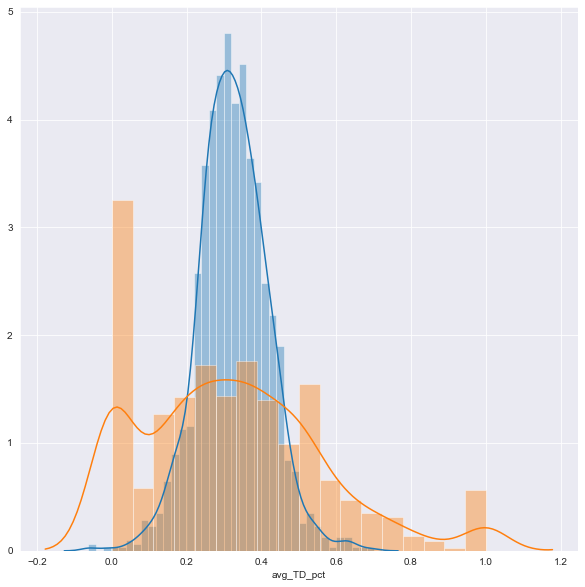

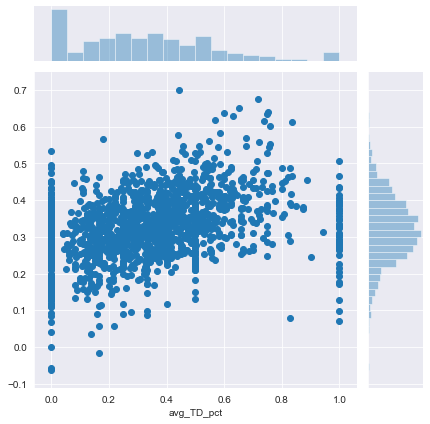

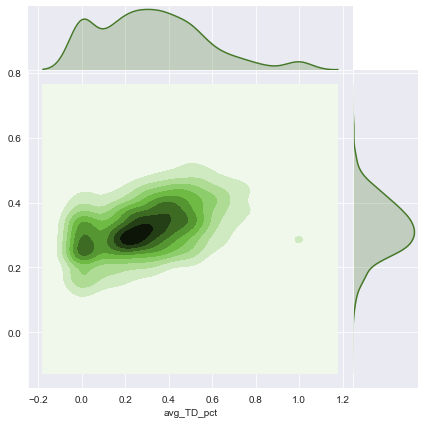

In [30]:
# visualizing the results:
final_models = [poly2_larsic_time_1m, poly3_larsic_ss, poly2_larsic_td_1m]

for model in final_models:
    plt.figure(figsize=(10,10))
    sns.distplot(model[0].predict(model[2]))
    sns.distplot(model[5])

    sns.jointplot(x=model[5], y=model[0].predict(model[2]))
    sns.jointplot(
    x = model[5],
    y = model[0].predict(model[2]),
    kind='kde',
    color='#457828',
    space=0)
    
    plt.show()
